## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

In [2]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn.model_selection import train_test_split

# вычисляем к-ты линейной регрессии
n = features.shape[1]+1
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size = 0.2, random_state=5)
w_analytic = np.zeros(n)

#-------- ВАШ КОД ТУТ -------------------

H = np.ones((X_train.shape[0],n))
H[:,1:n] = X_train
HT = H.transpose()
Y = Y_train.reshape(-1, 1)
w_analytic = np.dot(inv(np.dot(HT,H)),np.dot(HT,Y)).transpose().reshape(n)

reg = LinearRegression().fit(X_train, Y_train)
all_reg_coef = np.zeros(n)
all_reg_coef[0] = reg.intercept_
all_reg_coef[1:n] = reg.coef_
print(f"Коэффициенты, вычисленные моделью sklearn {all_reg_coef}")

#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')
print(f"\nЕвклидово расстояние между наборами коэффициентов {norm(all_reg_coef - w_analytic)}\n")

Коэффициенты, вычисленные моделью sklearn [ 3.79124870e+01 -1.30799852e-01  4.94030235e-02  1.09535045e-03
  2.70536624e+00 -1.59570504e+01  3.41397332e+00  1.11887670e-03
 -1.49308124e+00  3.64422378e-01 -1.31718155e-02 -9.52369666e-01
  1.17492092e-02 -5.94076089e-01]
Аналитически определённые коэффициенты [ 3.79124870e+01 -1.30799852e-01  4.94030235e-02  1.09535045e-03
  2.70536624e+00 -1.59570504e+01  3.41397332e+00  1.11887670e-03
 -1.49308124e+00  3.64422378e-01 -1.31718155e-02 -9.52369666e-01
  1.17492092e-02 -5.94076089e-01]

Евклидово расстояние между наборами коэффициентов 4.042634603515679e-11



## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

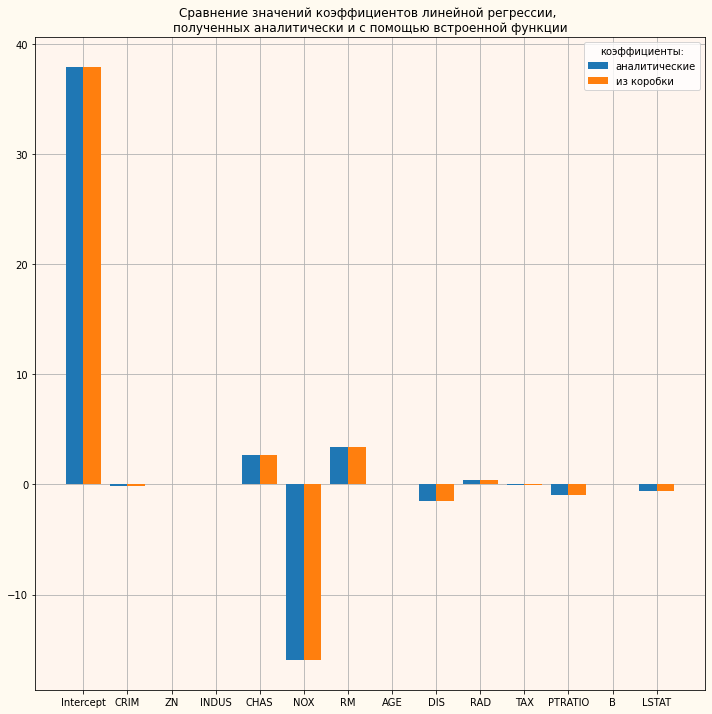

In [3]:
#-------- ВАШ КОД ТУТ -------------------
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Задаем смещение равное половине ширины прямоугольника:
n = 15
x1 = np.arange(1, n) - 0.2
x2 = np.arange(1, n) + 0.2

data_names = ['Intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

y1 = w_analytic
y2 = all_reg_coef

fig, ax = plt.subplots()
ax.set_title('Сравнение значений коэффициентов линейной регрессии, \nполученных аналитически и с помощью встроенной функции')
ax.bar(x1, y1, width = 0.4, label = 'аналитические', zorder = 2)
ax.bar(x2, y2, width = 0.4, label = 'из коробки', zorder = 2)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.xticks(range(1,len(data_names)+1), data_names)
plt.grid()
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()





#----------------------------------------

## Задание 3
Постройте предсказания двумя моделями
* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat y-y)^2$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

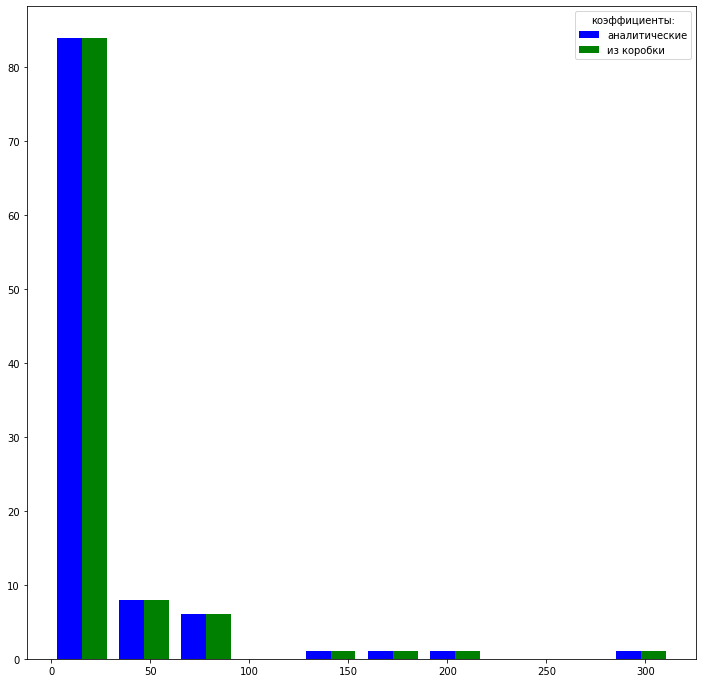

In [4]:
m = X_test.shape[0]
n = X_test.shape[1]+1
H_test = np.ones((X_test.shape[0],n))
H_test[:,1:n] = X_test
y_pred = np.dot(w_analytic.reshape(1,-1),H_test.transpose()).reshape(m)
y_pred_library = reg.predict(X_test)
error_analytic = (Y_test-y_pred)**2
error_function = (Y_test-y_pred_library)**2

fig, axs = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
axs.hist([error_analytic,error_function],color=['blue','green'], label=['аналитические','из коробки'])
ax.set_title('Сравнение ошибок регрессионных моделей \nс коэффициентами, полученными аналитически и с помощью встроенной функции')
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()

## Второй вариант модели (без свободного коэффициента)

## Задание 1

In [5]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn.model_selection import train_test_split

# вычисляем к-ты линейной регрессии
n = features.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size = 0.2, random_state=5)
w_analytic = np.zeros(n)

#-------- ВАШ КОД ТУТ -------------------

H = X_train
HT = H.transpose()
Y = Y_train.reshape(-1, 1)
w_analytic = np.dot(inv(np.dot(HT,H)),np.dot(HT,Y)).transpose().reshape(n)

reg = LinearRegression(fit_intercept=False).fit(X_train, Y_train)
all_reg_coef = reg.coef_
print(f"Коэффициенты, вычисленные моделью sklearn {all_reg_coef}")

#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')
print(f"\nЕвклидово расстояние между наборами коэффициентов {norm(all_reg_coef - w_analytic)}\n")

Коэффициенты, вычисленные моделью sklearn [-1.28297552e-01  5.36956641e-02 -2.66902863e-02  2.88353168e+00
 -3.36462948e-01  5.57559842e+00 -4.95200852e-03 -9.81819573e-01
  2.17650101e-01 -9.76367973e-03 -3.65138586e-01  1.79995978e-02
 -4.92002550e-01]
Аналитически определённые коэффициенты [-1.28297552e-01  5.36956641e-02 -2.66902863e-02  2.88353168e+00
 -3.36462948e-01  5.57559842e+00 -4.95200852e-03 -9.81819573e-01
  2.17650101e-01 -9.76367973e-03 -3.65138586e-01  1.79995978e-02
 -4.92002550e-01]

Евклидово расстояние между наборами коэффициентов 1.1609256291354538e-12



## Задание 2

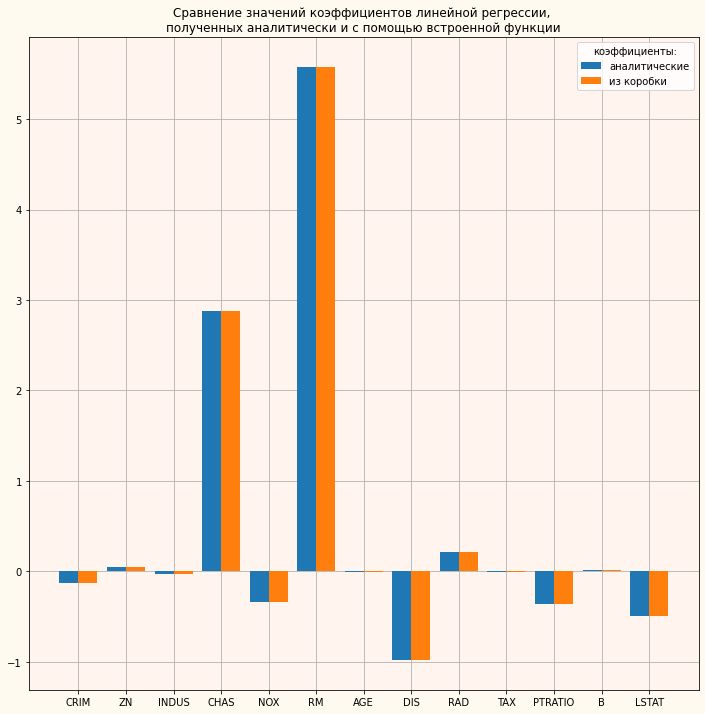

In [6]:
#-------- ВАШ КОД ТУТ -------------------
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Задаем смещение равное половине ширины прямоугольника:
n = 14
x1 = np.arange(1, n) - 0.2
x2 = np.arange(1, n) + 0.2

data_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

y1 = w_analytic
y2 = all_reg_coef

fig, ax = plt.subplots()
ax.set_title('Сравнение значений коэффициентов линейной регрессии, \nполученных аналитически и с помощью встроенной функции')
ax.bar(x1, y1, width = 0.4, label = 'аналитические', zorder = 2)
ax.bar(x2, y2, width = 0.4, label = 'из коробки', zorder = 2)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.xticks(range(1,len(data_names)+1), data_names)
plt.grid()
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()

#----------------------------------------

## Задание 3

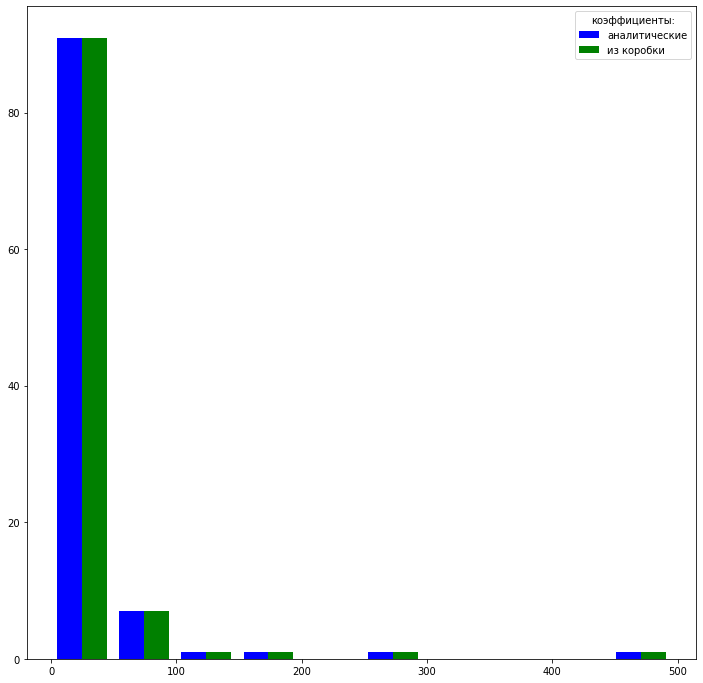

In [7]:
m = X_test.shape[0]
n = X_test.shape[1]
H_test = X_test
y_pred = np.dot(w_analytic.reshape(1,-1),H_test.transpose()).reshape(m)
y_pred_library = reg.predict(X_test)
error_analytic = (Y_test-y_pred)**2
error_function = (Y_test-y_pred_library)**2

fig, axs = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
axs.hist([error_analytic,error_function],color=['blue','green'], label=['аналитические','из коробки'])
ax.set_title('Сравнение ошибок регрессионных моделей \nс коэффициентами, полученными аналитически и с помощью встроенной функции')
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()